<a href="https://colab.research.google.com/github/Kang-Yoonah/BigAi/blob/gh-pages/3/HandsOn/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설정

노트: 이 출력(그리고 이 노트북과 다른 노트북의 출력)이 책의 내용과 조금 다를 수 있습니다. 걱정할 필요 없습니다. 괜찮습니다! 달라지는 이유가 몇가지 있습니다:

* 첫째, 사이킷런과 다른 라이브러리들이 발전하면서 알고리즘이 조금씩 변경되기 때문에 얻어지는 결괏값이 바뀔 수 있습니다. 최신 사이킷런 버전을 사용한다면(일반적으로 권장됩니다) 책이나 이 노트북을 만들 때 사용한 버전과 다를 것이므로 차이가 납니다. 노트북은 최신으로 업데이트하려고 노력하지만 책의 내용은 그렇게 할 수 없습니다.
* 둘째, 많은 훈련 알고리즘은 확률적입니다. 즉 무작위성에 의존합니다. 이론적으로 의사 난수를 생성하도록 난순 생성기에 시드 값을 지정하여 일관된 결과를 얻을 수 있습니다(random_state=42나 np.random.seed(42)를 종종 보게 되는 이유입니다). 하지만 여기에서 언급한 다른 요인으로 인해 충분하지 않을 때가 있습니다.
* 세째, 훈련 알고리즘이 여러 스레드(C로 구현된 알고리즘)나 여러 프로세스(예를 들어 n_jobs 매개변수를 사용할 때)로 실행되면 연산이 실행되는 정확한 순서가 항상 보장되지 않습니다. 따라서 결괏값이 조금 다를 수 있습니다.
* 마지막으로, 여러 세션에 결쳐 순서가 보장되지 않는 파이썬 딕셔너리(dict)이나 셋(set) 같은 것은 완벽한 재현성이 불가능합니다. 또한 디렉토리 안에 있는 파일의 순서도 보장되지 않습니다.

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#3.1 MNIST

사이킷런에서 제공하는 여러 헬퍼 함수를 사용해 잘 알려진 데이터셋을 내려받을 수 있다.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

사이킷런에서 내려받은 데이터셋은 일반적으로 다음과 같은 비슷한 딕셔너리 구조를 가지고 있다.
- 데이터셋을 설명하는 DESCR키
- 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data 키
- 레이블 배열을 담은 target 키

In [ ]:
# 데이터 설명
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
# 데이터 값과 레이블
X, y = mnist["data"], mnist["target"]
print('(이미지 개수, 각 이미지에 있는 특성 개수) :',X.shape)

(이미지 개수, 각 이미지에 있는 특성 개수) : (70000, 784)


In [ ]:
print('레이블 개수 :',y.shape)

레이블 개수 : (70000,)


결과
- 각 이미지에는 784개의 특성이 있다.
   - 이미지가 28 x 28 픽셀이라는 의미이다.
- 개개의 특성은 0(흰색)부터 255(검은색)까지의 픽셀 강도를 나타낸다.

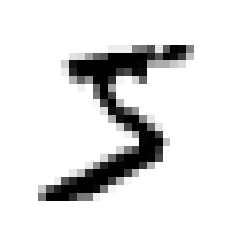


실제 레이블:  5


In [ ]:
# 이미지 하나 나타내어보기
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)    # 흑백 : mpl.cm.binary
plt.axis("off")
plt.show()

print()
print('실제 레이블: ',y[0])

In [ ]:
type(y[0])

str

In [ ]:
# 레이블이 문자열인데 대부분 머신러닝 알고리즘은 숫자를 기대하므로 y를 정수로 변환 
y = y.astype(np.uint8)

MNIST 데이터셋에서 숫자 이미지를 여러개 추출해보자.

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28   # 이미지 28 x 28인 사이즈 고정.
    images_per_row = min(len(instances), images_per_row)    # 각 행에 이미지 몇 개 출력할 것인가.
    n_rows = (len(instances) - 1) // images_per_row + 1   # 행의 개수.

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가:
    n_empty = n_rows * images_per_row - len(instances)   # 행*열 - 이미지 총 개수 = 여백 공간
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합친다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합친다.:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 완성한 큰 이미지 출력
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

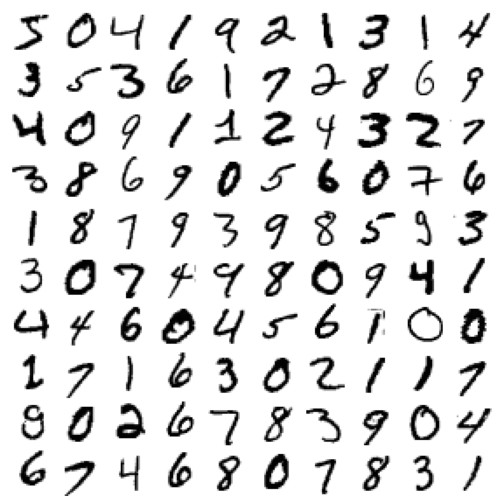

In [ ]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images)
plt.show()

이제 데이터를 자세히 조사하기 전에 테스트 세트를 떼어놓고 시작하자.

MNIST 데이터셋은 이미 훈련 세트(앞쪽 60,000개 이미지)와 테스트 세트(뒤쪽 10,000개 이미지)로 나눠져있다.

훈련 세트로 교차 검증 폴드를 만드는데, 데이터셋을 섞음으로써 모든 폴드에 특정 숫자가 누락되지 않도록 한다.   
하지만 시계열 데이터와 같이 어떤 경우에는 섞는 것이 좋지 않을 때가 있다.

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#3.2 이진 분류기 훈련

먼저 문제를 단순화해서 하나의 숫자, 5만 식별해보자.(5면 O, 아니면 X)

즉, '5-감지기'는 '5'와 '5아님' 두 개의 클래스를 구분할 수 있는 **이진 분류기**의 한 예이다.

In [ ]:
# 분류 작업을 위해 타깃 벡터 만들기
y_train_5 = (y_train == 5)   # 레이블 5인 것 : True  /  5아닌 것 : Flase
y_test_5 = (y_test == 5)

예시 모델로 사이킷런의 SGDClassifier 클래스를 사용해 확률적 경사 하강법(SGD) 분류기를 사용한다.

- 특징
   - 한 번에 하나씩 훈련 샘플을 독립적으로 처리하기 때문에 매우 큰 데이터셋을 효율적으로 처리함.

이제 이 모델을 만들고 전체 훈련 세트를 사용해 훈련시켜보자.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])   # some_digit는 맨 처음 데이터, 5였다.

array([ True])

예시로 들어본 데이터를 잘 맞췄다.   
이제 훈련된 모델로 분류를 잘 하는지, 훈련이 잘 되었는지 모델의 성능을 평가해보자.

#3.3 성능 측정

분류기 평가는 회귀 모델보다 훨씬 어렵다.   
회귀에서 생각했던 평가방식과는 다르고, 사용할 수 있는 성능 지표가 많다.

## 교차 검증을 사용한 정확도 측정

분류기의 성능 측정 지표로 정확도를 선호하지 않는다.   
특히 불균형한 데이터셋을 다룰 때 더욱 그렇다.   
이에 대한 예시로 다음을 보자.

In [ ]:
from sklearn.model_selection import cross_val_score

# 폴드가 3개인 K-겹 교차 검증
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
# cross_val_score()함수와 같은 기능을 하는 교차 검증 코드를 구현해보자.
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle = True)     # 계층적 샘플링을 해주는 변환기 생성

for train_index, test_index in skfolds.split(X_train, y_train_5):   # 3겹이므로, 3쌍(train, test)의 인덱스를 반환
    clone_clf = clone(sgd_clf)          # 앞서 만든 모델 clone(복제)
    X_train_folds = X_train[train_index]      # 해당 폴드의 x_train 데이터 인덱싱
    y_train_folds = (y_train_5[train_index])  # 해당 폴드의 y_train데이터 인덱싱
    X_test_fold = X_train[test_index]         # 해당 폴드의 x_test 데이터 인덱싱
    y_test_fold = (y_train_5[test_index])     # 해당 폴드의 y_test 데이터 인덱싱

    clone_clf.fit(X_train_folds, y_train_folds)  # 모델 학습
    y_pred = clone_clf.predict(X_test_fold)      # 모델 적합값(True or False)
    n_correct = sum(y_pred == y_test_fold)       # 실제값과 비교
    print(n_correct / len(y_pred))               # 전체 값 대비 분류된 값

0.9669
0.91625
0.96785


높은 정확도가 나왔다.   
모든 이미지를 '5 아님' 클래스로 분류하는 더미 분류기를 만들어서 비교해본다.

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass   # 어차피 모든 input을 '5 아님'으로 분류하므로 fit할 필요가 없다.
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)    # 들어온 데이터 모두 False으로 output (데이터 크기 맞춰서 output)

`np.zeros(size,dtype=bool)`
- `dtype = bool` 옵션은 0이면 False, 0이 아니면 True를 반환해주는 옵션이다.  
 `np.zeros`함수는 모든 숫자를 0으로 채워주므로 모두 False가 삽입된다.

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

결과
- 이는 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유를 나타낸다.
- 분류 모델에서 정확도는 (맞힌 수)/(전체 수) 이므로 분류를 정확도로 평가하기엔 충분하지 않은 평가가 된다.   
분류를 잘 하지 못하더라도 위의 더미 분류기 예시처럼 정답 클래스가 정답이 아닌 클래스보다 훨씬 많다면 정확도는 높게 측정된다.
- 특히 불균형한 데이터셋을 다룰 때(즉, 어떤 클래스가 다른 것보다 월등히 많은 경우) 분류 모델에서 정확도는 좋은 평가 지표가 되지 못한다.

## 오차 행렬


*개선하는 시작점* : **오차 행렬**
- 기본적인 아이디어는 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것
- 예를 들어 분류기가 숫자 5의 이미지를 3으로 잘못 분류한 횟수가 오차 행렬의 5행 3열에 저장되는 것.

In [ ]:
# 먼저 예측값 만들기
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
# 타깃 클래스와 예측 클래스를 가지고 오차 행렬 만들기
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
# 완벽한 분류기일 경우
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

오차 행렬에서 더욱 요약된 지표 : **정밀도**와 **재현도**

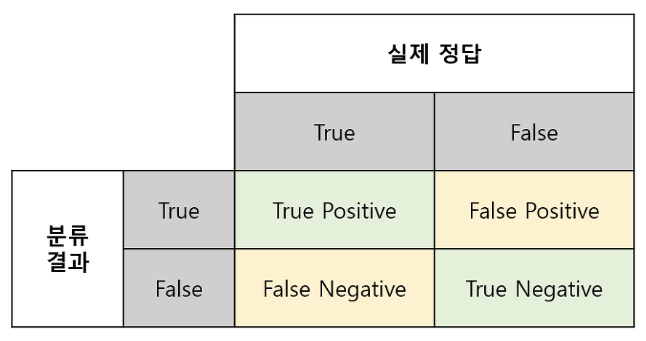

>   - True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
>   - False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
>   - False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
>   - True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)

정밀도 Precision : 양성 예측의 정확도
- TP/(TP+FP)
- 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
- Positive 정답률, PPV(Positive Predictive Value)라고도 불린다.

재현율 Recall
- TP/(TP+FN)
- 실제 True인 것중에서 모델이 True라고 예측한 것의 비율
- 통계학에서는 Sensitivity 민감도로, 그리고 다른 분야에서는 hit rate 또는 True Positive(TPR)라는 용어로도 사용한다.

정밀도나 재현율은 모두 실제 True인 정답을 모델이 True라고 예측한 경우에 관심이 있으나, 바라보고자 하는 관점이 다르다.   
Precision은 모델의 입장에서, Recall은 실제 정답(data)의 입장에서 정답을 정답이라고 맞춘 경우를 보고 있다.

정밀도나 재현율의 더욱 자세한 내용은 다음 블로그를 참고하자.

참고 주소 : https://sumniya.tistory.com/26

## 정밀도와 재현율

Precision과 Recall을 사이킷런을 통해 구해보자.

In [ ]:
from sklearn.metrics import precision_score, recall_score

print('Precision_score :',precision_score(y_train_5, y_train_pred))

Precision_score : 0.8370879772350012


In [ ]:
print('Recall_score :',recall_score(y_train_5, y_train_pred))

Recall_score : 0.6511713705958311


F1 score
- Precision과 Recall의 조화 평균
- 데이터 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가할 수 있으며, 성능을 하나의 지표로 표현할 수 있다.
- 단순 산술 평균이 아니라 조화 평균으로 사용하는 이유는   
큰 비중이 끼치는 bias가 보다 줄어들게 하기 위해서이다.
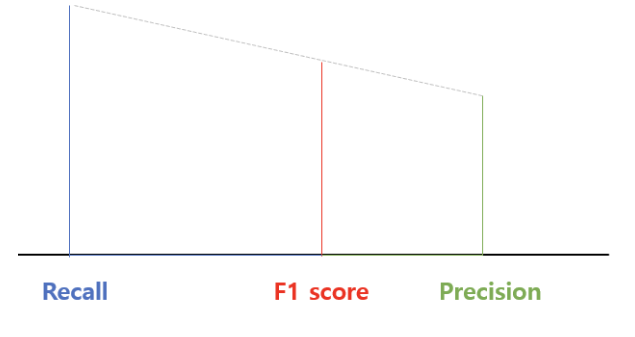

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

상황에 따라 정밀도가 중요할 수도 있고 재현율이 중요할 수도 있다.

정밀도를 올리면 재현율이 줄고 재현율을 올리면 정밀도가 내려간다.   
이를 Precision-Recall Trade-off라고 한다.

## 정밀도/재현율 트레이드오프

**사이킷런 분류기의 예측 불확실성 추정 함수**
- 분류기에서 예측의 불확실성을 추정하는 함수는 크게 2가지가 있다. 대부분의 분류 클래스가 두 함수 또는 최소 한 개를 제공한다. 이진분류뿐만 아니라 다중 분류에도 사용할 수 있다.
- `decision_function`
>   - 임계값은 0
>   - 각 샘플의 점수를 계산하는데 이 점수가 임계값보다 크면 샘플을 양성 클래스에 할당하고 그렇지 않으면 음성 클래스에 할당한다.
>   - 이진분류에서 decision_function의 결과값은 n_samples이며 각 샘플이 하나의 실수값을 반환한다. decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라진다.
>   - 다중분류에서 decision_fuction의 결과값의 shape는 (n_samples, n_classes)이다.    
각 열이 각 클래스에 대한 확신 점수로, 수치가 크면 해당 클래스에 속할 가능성이 높고 수치가 작으면 속할 가능성이 낮다.
>   - 이 결과값은 임의의 범위를 갖고있다. 불균형 데이터에서 임계값을 바꾸면 더 좋은 결과를 얻을 수 있지만 범위가 정해져있지않기 때문에 최적의 임계점을 고르는게 쉽지 않다.


https://for-my-wealthy-life.tistory.com/22

In [ ]:
# 사이킷런에서 임곗값을 직접 지정할 수 없지만 예측에 사용한 점수는 확인할 수 있다.
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
# 임계값 0일 때
threshold = 0
y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([ True])

In [ ]:
# 임계값 8000일 때
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

결과
- 임곗값을 높이면 재현율이 줄어든다.
   - 임곗값을 높이면 실제로 '5'인 이미지를 놓치게 되어서 재현율은 줄어들 수 밖에 없다.
- 정밀도는 임곗값을 높이더라도 잘못 판별한 이미지의 decision_function의 점수가 높을 수 있으니 가끔 낮아질 수 있다.   
하지만 보통 임곗값을 높이면 정밀도는 높아진다.

**적절한 임곗값을 찾는 법**
- 모든 샘플의 결정 점수를 구하여 모든 임곗값에 대해 정밀도와 재현율을 계산한다.   
계산한 정밀도와 재현율을 그래프로 그려보면서 적절한 임곗값을 찾도록 한다!

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
# 가능한 모든 임곗값에 대해 정밀도, 재현율 계산하기
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

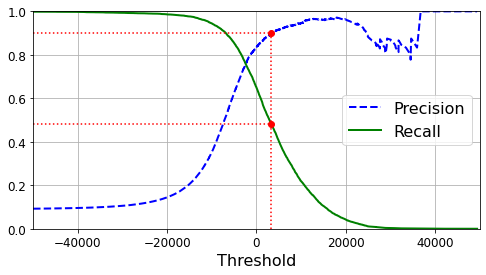

In [ ]:
# 그래프 그리기
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                               # 그리드 그리기
    plt.axis([-50000, 50000, 0, 1])              # x축, y축 설정하기

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.show()

In [ ]:
# decision_function의 점수가 임곗값 0을 넘어가야 '5 맞음'으로 분류됨을 다음 코드로 알 수 있다.
(y_train_pred == (y_scores > 0)).all()

True

적절한 임곗값을 찾는 또다른 방법은 **재현율에 대한 정밀도 곡선**을 그리는 것

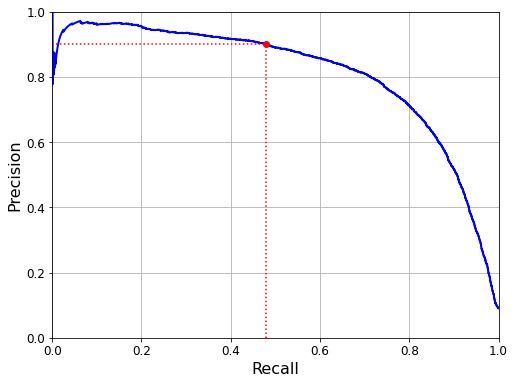

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

정밀도가 급격하게 줄어들기 시작하는 하강점 직전을 정밀도/재현율 트레이드오프로 선택하는 것이 좋다.

이런 방법으로 어떤 가상의 정밀도에 대해서도 분류기를 손쉽게 만들 수 있다.   
항상 재현율, 정밀도를 모두 고려하여 평가하도록 해야한다.

In [ ]:
# 정밀도 90% 달성하는 것이 목표일 때
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print('precision이 90%일 때의 임곗값:',threshold_90_precision)
print()
# 임곗값 업데이트해서 precision 점수 내보기
y_train_pred_90 = (y_scores >= threshold_90_precision)
print('Precidion:',precision_score(y_train_5, y_train_pred_90))
print('Recall:',recall_score(y_train_5, y_train_pred_90))

precision이 90%일 때의 임곗값: 3370.0194991439557

Precidion: 0.9000345901072293
Recall: 0.4799852425751706


## ROC 곡선

**ROC(Receiver Operating Characteristic)곡선**은 정밀도/재현율 곡선과 매우 비슷하지만, 이는 거짓 양성비율(FPR)에 대한 진짜 양성비율(TPR)의 곡선이다.

- 거짓 양성비율(FPR) : 양성으로 잘못 분류된 음성 샘플의 비율 
   - $\frac{FP}{FP+TN}$ = 1 - $\frac{TN}{FP+TN}$
- 진짜 양성비율(TPR) : 재현율 
   - $\frac{TP}{TP+FN}$
- 진짜 음성비율(TNR) (특이도 라고도 부른다): 
   - $\frac{TN}{FP+TN}$

즉, ROC는 FPR에 대한 TPR 그래프이다.
$\frac{Recall}{FPR}$

In [ ]:
# 먼저 가능한 모든 임곗값에서 TPR과 FPR 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

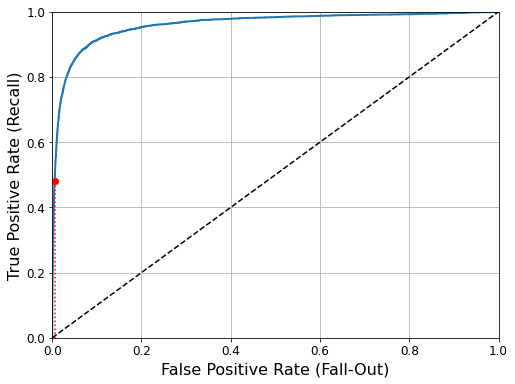

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")                        
plt.show()

결과
- ROC에서도 트레이드오프 존재
   - TPR이 높을수록 분류기가 만드는 거짓 양성인 FPR이 늘어난다.
- 점선은 완전한 랜덤 분류기의 ROC 곡선을 뜻한다.
   - 랜덤 분류기는 훈련 데이터의 클래스 비율을 따라 무작위로 예측하는 것을 말한다.   
   이렇게 되면 오차 행렬의 실제 클래스가 비슷한 비율의 예측 클래스로 나뉘어 FPR과 TPR값이 비슷해지게 된다.   
   이의 ROC 곡선이 완전한 램던 분류기의 ROC 곡선이라고 한다.
   - 좋은 분류기는 이 점선에서 최대한 멀리 떨어져 있어야한다.

**AUC**
- 곡선 아래의 면적 측정
- ROC curve는 그래프이기 때문에 명확한 수치로써 비교하기가 어렵다.   
이를 해결하기 위해 그래프 아래의 면적값을 이용하는 것이 AUC(Area Under Curve)이다.
- 최대값은 1이며 좋은 모델(즉, Fall-out에 비해 Recall 값이 클수록) 1에 가까운 값이 나온다.
- 완벽한 분류기는 ROC의 AUC가 1이다.
   - 반면, 완전한 랜덤 분류기는 ROC의 AUC가 0.5이다.

In [ ]:
# ROC의 AUC 계산
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

---
*ROC 곡선을 사용할까 PR 곡선을 사용할까?*

일반적인 법칙
- 양성 클래스가 드물거나 거짓 음성보다 거짓 양성이 더 중요할 때 PR 곡선을 사용한다.
   - PR 곡선에는 Precision에서 거짓 양성을 따지므로 거짓 음성보다 거짓 양성이 더 중요할 때 PR을 쓸 수 있다.
   - 양성 클래스가 음성 클래스보다 훨씬 적으면, FPR의 분모가 TPR의 분모보다 상대적으로 훨씬 크므로 값이 작다.   
   따라서 이때는 PR 곡선이 분류기의 성능 개선 여지가 얼마나 되는지 잘 보여줄 수 있다.
---
 

이제 랜덤 포레스트 분류기를 훈련시켜 SGDClassifier의 ROC곡선 및 ROC AUC 점수를 비교해보자.

**사이킷런 분류기의 예측 불확실성 추정 함수**
- `predict_proba`
>   - 임계값 0.5
>   - 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 담은 배열을 반환
>   - 결과값이 항상 0과 1사이의 값으로, 각 클래스에 대한 확률이며 각 클래스에 속할 확률의 합은 항상 1이다.
>   - 결과값이 0과 1 사이의 값으로 고정되어 있기 때문에, 임계값 선택이 더 쉽고 결정함수에 비해 해석도 더 용이하다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)   # 모델 생성
# 훈련 세트의 샘플에 대한 점수 얻기
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # 점수 = 양성 클래스의 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

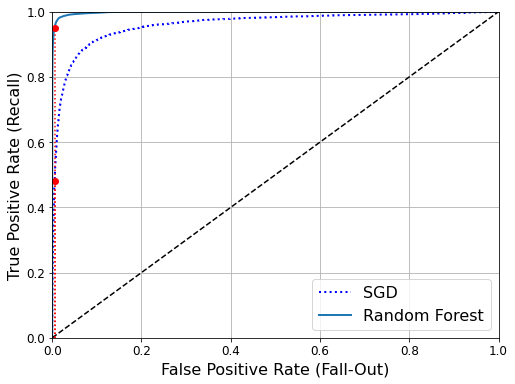

In [ ]:
# ROC 곡선 그리기
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
# 수치로 확인하기
print('랜덤포레스트 ROC AUC :',roc_auc_score(y_train_5, y_scores_forest))
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print('랜덤포레스트 Precision :',(precision_score(y_train_5, y_train_pred_forest)))
print('랜덤포레스트 Recall :',(recall_score(y_train_5, y_train_pred_forest)))

랜덤포레스트 ROC AUC : 0.9983436731328145
랜덤포레스트 Precision : 0.9905083315756169
랜덤포레스트 Recall : 0.8662608374838591


결과
- 랜덤포레스트의 ROC곡선이 SGD 모델보다 좋다.
- Precision, Recall 점수 또한 더욱 좋다.

이로써 이진분류기를 훈련시키는 방법과 작업에 맞는 적절한 지표 선택,   
교차 검증을 사용한 평가, 요구 사항에 맞는 정밀도/재현율 트레이드오프 선택,   
ROC 곡선과 ROC AUC 점수를 사용한 여러 모델의 비교를 알게 되었다.

이제 다중 분류로 가보자.

#3.4 다중 분류

**다중 분류기**
- 둘 이상의 클래스 구별
- 일부 알고리즘(SGD, randomforest, naive bayes 등)은 여러 개의 클래스를 직접 처리할 수 있는 반면,   
또다른 일부 알고리즘(로지스틱 회귀나 SVM 분류기 등)은 이진 분류만 가능하다.
   - 하지만, 이진 분류기를 여러 개 사용해 다중 클래스 분류하는 기법도 많다.

>   **OvR**
>   - one-versus-the rest, 클래스마다 이진 분류기를 만들어서 가장 높은 결정점수를 낸 클래스를 선택
>   - 대부분의 이진 분류 알고리즘이 선호함

>   **OvO**
>   - one-versus-one, 모든 가능한 두 개의 클래스 조합 ($\frac{n(n-1)}{2}$)에 대해 이진 분류기를 만듦.   
가장 많이 양성으로  분류된 클래스 선택.
>   - 주요 장점 : 각 분류기의 훈련에 전체 훈련 세트 중 구별할 두 클래스에 해당하는 샘플만 필요하다.
>      - SVM같은 일부 알고리즘은 훈련 세트의 크기에 민감해서 큰 훈련 세트에서 몇 개의 분류기를 훈련시키는 것보다   
작은 훈련 세트에서 많은 분류기를 훈련시키는 쪽이 빠르다.

다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 알고리즘에 따라 자동으로 OvR 또는 OvO를 실행한다.

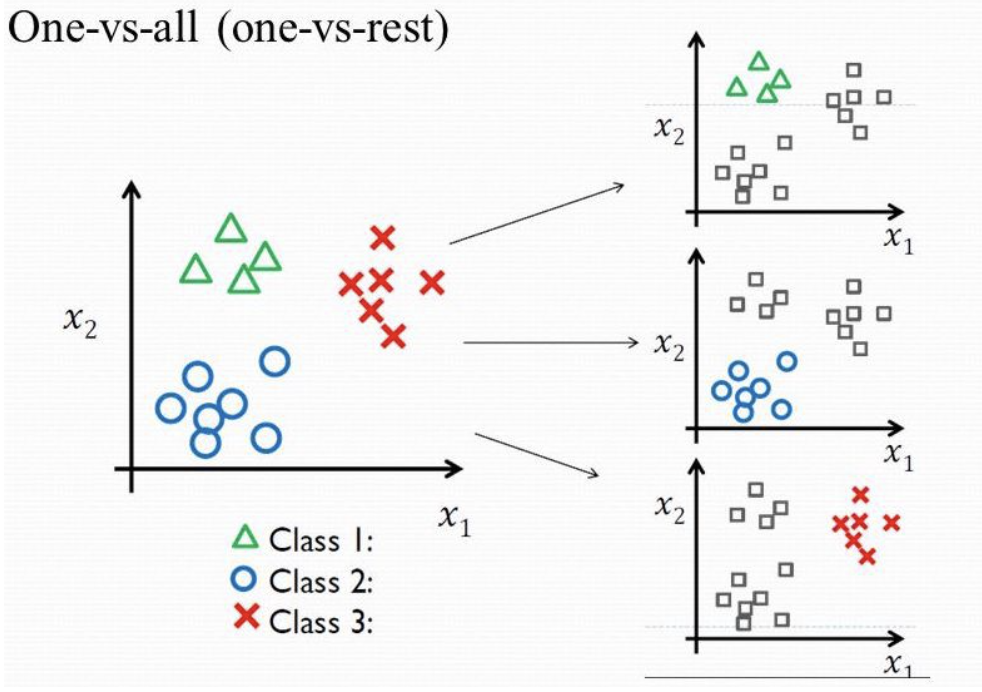

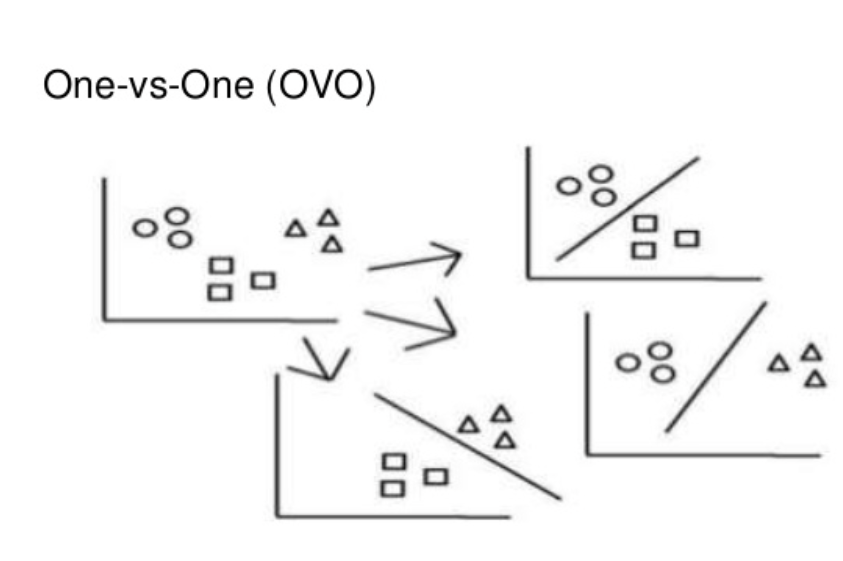

이미지 참고 : https://dongsam-memo.tistory.com/24

sklearn.svm.SVC 홈페이지 참고 : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
# 서포트 벡터 머신 분류기 테스트
from sklearn.svm import SVC

svm_clf_ovo = SVC(gamma="auto", random_state=42, decision_function_shape = 'ovo')
svm_clf_ovo.fit(X_train[:1000], y_train[:1000]) # y_train_5이 아니라 y_train입니다
svm_clf_ovo.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
# 내부에서는 사이킷런이 OvO전략을 사용하여 0부터 9까지 45개의 조합을 생성하여 이진분류기를 훈련시키고 
# 각각의 결정 점수를 얻어서 점수가 가장 높은 클래스를 선택
some_digit_scores = svm_clf_ovo.decision_function([some_digit])
print(some_digit_scores)
print(len(some_digit_scores[0]))

[[-0.1637931  -0.02020202  0.04123711 -0.07619048 -0.94845361  0.03092784
  -0.17094017  0.10309278 -0.03        0.14655172  0.19827586  0.09482759
  -0.79310345  0.18965517 -0.00854701  0.25        0.13793103  0.06060606
  -0.05714286 -0.92929293  0.05050505 -0.15384615  0.12121212 -0.01
  -0.11428571 -0.98924731 -0.0106383  -0.20512821  0.06451613 -0.07
  -0.87619048  0.1047619  -0.1025641   0.17142857  0.04761905  0.9787234
   0.78632479  0.99966033  0.92       -0.1965812   0.07446809 -0.06
   0.25641026  0.14529915 -0.13      ]]
45


In [ ]:
svm_clf_ovr = SVC(gamma="auto", random_state=42, decision_function_shape = 'ovr')
svm_clf_ovr.fit(X_train[:1000], y_train[:1000]) # y_train_5이 아니라 y_train입니다
svm_clf_ovr.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
some_digit_score = svm_clf_ovr.decision_function([some_digit])
some_digit_score

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [ ]:
print(f'some_digit의 결정 점수에서 제일 높은 인덱스: {np.argmax(some_digit_score)}')
print()
print('타깃 클래스 리스트')
print(svm_clf_ovr.classes_)
print()
print('이 예시에서는 타깃 클래스의 인덱스와 클래스 값 자체가 같음:',svm_clf_ovr.classes_[5])

some_digit의 결정 점수에서 제일 높은 인덱스: 5

타깃 클래스 리스트
[0 1 2 3 4 5 6 7 8 9]

이 예시에서는 타깃 클래스의 인덱스와 클래스 값 자체가 같음: 5


In [ ]:
# OvR 사용하도록 강제하기
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
print('ovr_clf의 예측:',ovr_clf.predict([some_digit]))
print('분류기 개수:',len(ovr_clf.estimators_))

ovr_clf의 예측: [5]
분류기 개수: 10


In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SVC(gamma="auto", random_state=42))
ovo_clf.fit(X_train[:1000], y_train[:1000])
print('ovo_clf의 예측:',ovo_clf.predict([some_digit]))
print('분류기 개수:',len(ovo_clf.estimators_))

ovo_clf의 예측: [5]
분류기 개수: 45


In [ ]:
# 이제 SGD 분류기를 훈련시켜보자.
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
# 모델 자체에서 다중 클래스 분류를 할 수 있기 때문에 ovo, ovr 전략이 필요없다.
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

결과
- 모델마다 직접 다중 클래스를 분류할 수 있는지, 이진 분류라면 ovo를 사용해야하는지 아니면 ovr을 사용해야하는지 다 다를 수 있다.
- 우린 그때그때 필요한 모델을 가져와쓰는데, 기본적인 체계와 원리를 이해하고 넘어가는 것이 중요하겠다.

#3.5 에러 분석

이제 가능성이 높은 모델을 하나 찾았다고 가정하고 이 모델의 성능을 향상시킬 방법을 찾아보자.   
1. 만들어진 에러의 종류를 분석
   - 오차 행렬 살펴보기

In [ ]:
# 다중 분류기 오차행렬 만들기
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [ ]:
# 오차 행렬 그림으로 나타내어 분석하기
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

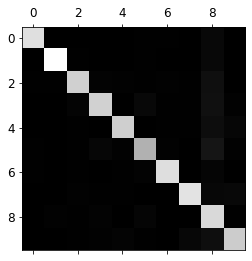

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

결과
- 주대각선 색이 밝은 것을 통해 대부분의 이미지가 올바르게 분류되었음을 알 수 있다.
- 숫자 5가 다른 숫자보다 조금 더 어두워 보인다.
   - 데이터셋에 숫자 5의 이미지가 적거나, 분류기가 실제로 숫자 5를 다른 숫자만큼 잘 분류하지 못한다는 뜻이다.
   - 가능한 가설들에 대해 모두 확인해봐야한다.

이제 그래프의 에러 부분에 초점을 맞춰보자.   
오차 행렬의 각 값을 대응하는 클래스의 이미지 개수로 나누어 에러 비율을 비교한다.

In [ ]:
# 에러 개수만 따지기
row_sums = conf_mx.sum(axis=1, keepdims=True)   # 각 원소 값을 각 행의 모든 열의 값을 모두 더한 값(클래스 이미지 개수)으로 나누어 에러 비율
norm_conf_mx = conf_mx / row_sums

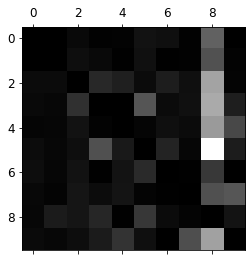

In [ ]:
# 에러 비율 그래프
np.fill_diagonal(norm_conf_mx, 0)   # 대각선 값을 모두 0으로 지정
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)   # 이제 색이 밝을 수록 에러 비율이 높은 것이다.
plt.show()

결과
- 클래스 8의 열이 상당히 밝다
   - 많은 이미지가 8로 잘못 분류되었다.
   - 하지만 그렇다고 클래스 8의 행이 함께 밝진 않다.   
   즉, 오차행렬은 symmetric한 행렬이 아니다.
   - 8로 잘못 분류되는 것을 줄이도록 개선할 필요가 있다.
- 개선 방법
   - 8처럼 보이지만 실제 8은 아닌 숫자의 훈련 데이터를 더 많이 모아서 실제 8과 구분하도록 분류기를 학습시킨다.
   - 분류기에 도움될 만한 특성을 더 찾아본다.


## 개개의 에러 분석해보기

분류기가 무슨 일을 하고, 왜 잘못되었는지에 대해 통찰을 얻도록 한다.   
하지만 이 방식은 더 어렵고 시간이 오래 걸린다는 단점이 있다.

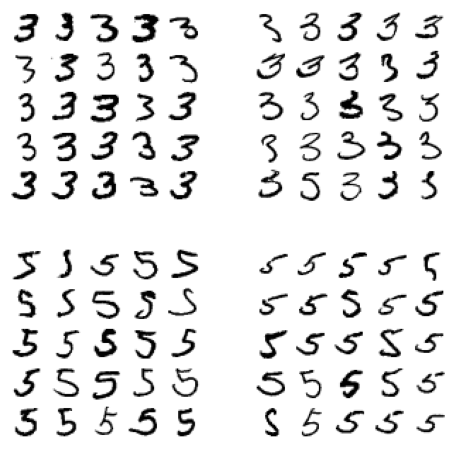

In [ ]:
cl_a, cl_b = 3, 5   # 클래스 3, 클래스 5 설정.
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]   # 실제 클래스 3 & 예측 클래스 3
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]   # 실제 클래스 3 & 예측 클래스 5
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]   # 실제 클래스 5 & 예측 클래스 3
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]   # 실제 클래스 5 & 예측 클래스 5

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

결과
- 실제로 데이터 자체가 정말 잘못 쓰여 있어서 분류하기 어려운 것도 있음.
- 하지만 대부분은 잘못 분류한 것이 확실한 에러임.
   - 현 상황을 분석하여 왜 분류를 못했는가의 원인을 찾아야한다.
- 원인
   - 선형 모델인 SGD분류기를 사용해서.
   - 선형 분류기는 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산.
   - 3과 5는 몇 개의 픽셀만 다르기 때문에 모델이 쉽게 혼동하는 것.
- 개선 방향
   - 위의 그림에서 3과 5의 주요 차이를 분석해본다.
      - 주요 차이 : 위쪽 선과 아래쪽 호를 이어주는 작은 직선의 위치.
   - 분류된 특징
      - 숫자 3을 쓸 때 연결 분위가 조금 왼쪽으로 치우지면 분류기가 5로 분류하고   
      이 반대도 마찬가지
      - 즉, 분류기는 이미지의 위치나 회전 방향에 매우 민감하다.
   - 이미지를 중앙에 위치시키고 회전되어 있지 않도록 전처리하도록한다.

#3.6 다중 레이블 분류

**다중 레이블 분류**
- 여러 개의 이진 꼬리표를 출력하는 분류 시스템
- 출력하는 레이블이 한 개가 아닌 여러 개 일 때.
- 모델에 따라 다중 레이블 분류를 지원하는 것이 있고 지원하지 않는 것이 있다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 예시로 7이상의 수인 것, 홀수인 것 2개의 레이블에 대해 분류하도록 하겠다.
y_train_large = (y_train >= 7)   
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]    # 타깃 레이블

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

다중 레이블 분류기 평가하기
- 평가 방법은 매우 많고, 적절한 지표는 프로젝트에 따라 다르다.
- 특정 레이블의 종류의 수가 다른 레이블보다 더욱 많다면, 분류기의 점수에 더 높은 가중치를 두도록 한다.
   - 즉, 레이블에 클래스의 지지도(타깃 레이블에 속한 샘플 수)를 가중치로 주는 것이다.
   - `average = "weighted"`
   
예시로 각 레이블의 F1 점수를 구하고 평균 점수를 계산해보자.

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

#3.7 다중 출력 분류

다중 출력 다중 클래스 분류는 간단히 다중 출력 분류라고 부르기도 한다.   
다중 출력 분류는 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것이다.

예시로 이미지에서 잡음을 제거하는 시스템을 만들어보자.   

---
*구상*
- input : 잡음이 많은 숫자 이미지
- output : 깨끗한 숫자 이미지를 MNIST 이미지처럼 픽셀의 강도를 담은 배열로 출력.
   - 출력이 여러 픽셀값들 이므로 다중 레이블
   - 각 픽셀값이 0 ~ 255의 범위에서 값을 가질 수 있으므로 다중 클래스

In [ ]:
# 일부러 픽셀 강도에 잡음 추가
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# 원본 이미지가 타깃 이미지
y_train_mod = X_train
y_test_mod = X_test

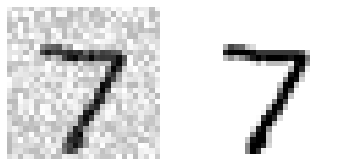

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# 테스트에서 데이터를 들여다보면 절대 안되지만 여기선 흐름상 예시로 이미지 하나 선택
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

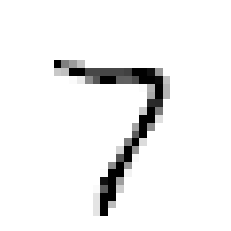

In [ ]:
# 모델에 훈련시켜서 이미지 깨끗하게 만들어보기
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digits(clean_digit)
plt.show()